# Problem Statement: 
Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility. This feature will help bring more attention to newer apps that have the potential.

# Analysis to be done: 
The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, are always great indicators of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split

In [2]:
# call the datset 
google = pd.read_csv("googleplaystore.csv")
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# lets check the null values
google.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
#drop all the null values
google.dropna( how= "any", inplace=True)
google.isnull().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [5]:
# check for dulicate values
google.duplicated().value_counts()

False    8886
True      474
dtype: int64

Interpretation: we can see there are 474 duplicated rows :

In [6]:
print("before droping the duplicate rows the shape of google dataset is{}".format(google.shape))
google_1 =google.drop_duplicates()
print("After droping the duplicate rows the shape of google_1 dataset is{}".format(google_1.shape))

before droping the duplicate rows the shape of google dataset is(9360, 13)
After droping the duplicate rows the shape of google_1 dataset is(8886, 13)


In [7]:
# Some  variables are not arranged format way, lets do it: 
google['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

we can see that the values stored in the size column  has both interger and string and dtype =object, lets convert itinto integer

In [8]:
def change_size(size):
    if 'M' in size:
        x=size[:-1]
        x=float(x)*1000
        return(x)
    elif 'k' in size:
        x= size[:-1]
        x=float(x)*1000
        return (x)
    else:
        return None

In [9]:
# lets apply the above function into the column name size
google['Size'] =google['Size'].map(change_size)

In [10]:
google['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [11]:
# lets check th nan value in column size:
google['Size'].isnull().sum()


1637

In [12]:
# lets fill the nan value using pad method or ffill method 
google.Size.fillna(method= 'pad',inplace =True)
print("the null values in  Size Column",google.Size.isnull().sum() )

the null values in  Size Column 0


In [13]:
google.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9360, dtype: object

In [14]:
# lets convert the installs in integer form.

def clean (val):
    return int(val.replace(",","").replace("+",""))

In [15]:

google.Installs =google.Installs.map(clean)

In [16]:
google.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64

Interpretation : hence we have successfuly done the conversion of categorical into numerical format.

In [17]:
google.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: object

In [18]:
# lets convert the dtype into int64
google['Reviews']=google['Reviews'].astype('int64')

In [19]:
google['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int64

In [20]:
google.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [21]:
google.Price.value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [22]:
# lets remove the $ sign and convert it into numerical data
google['Price']= google['Price'].apply(lambda x:0 if x=='0'else float(x[1:]))

In [23]:
google['Price'].value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

Hence the $ sign has been removed.

In [24]:
# lets check if futher rectification is needed.
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


Interpretation:hence we can see some of the required data column has been converted into numerical data from categorical data.

In [25]:
google.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
# lets convert the int64 into float64 for no error during the model accuracy,
google['Reviews']=google['Reviews'].astype('float64')
google['Installs']=google['Installs'].astype('float64')


In [27]:
google.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [28]:
# the  average ratings are from 1 to 5 hence above that will be act as an outliers therefore we will remove them.
#Drop the rows that have a value outside this range.
print("the length of ratings:",len(google[google.Rating>5]) )
print("the length of reviews: ", len(google[google.Reviews>google.Installs]))
print("the length of app that are free in price", len(google[(google.Type=="free")&(google.Price>0)]))

the length of ratings: 0
the length of reviews:  7
the length of app that are free in price 0


In [29]:
print("the shape of the google play store",google.shape )

the shape of the google play store (9360, 13)


In [30]:
google= google[google.Reviews<google.Installs]

In [31]:
print("the shape of the google play store",google.shape )

the shape of the google play store (9351, 13)


Reviews should not be more than installs,as only those who installs  can be review the app, if there are any such records, drop them.

In [32]:
print(len(google[google.Price>200]))
google= google[google.Price<200]
print("Google play store whose price is greater than 200", google.shape)
# lets check the review length whose review rate is greater than 2000000
print(len(google[google.Reviews>=2000000]))
google= google[google.Reviews<=2000000]
print("the shape of the google play store whose reviews >200000",google.shape )


15
Google play store whose price is greater than 200 (9336, 13)
453
the shape of the google play store whose reviews >200000 (8883, 13)


In [33]:
# For free apps (type = “Free”), the price should not be >0. Drop any such rows
print(google.Installs.quantile([.25,.50,.75,.90,.99]))

print(len(google[google.Installs>=10000000]))
google=google[google.Installs<=10000000]
print(google.shape)

0.25        10000.0
0.50       500000.0
0.75      5000000.0
0.90     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64
1627
(8494, 13)


# Outliers Treatment




<AxesSubplot: >

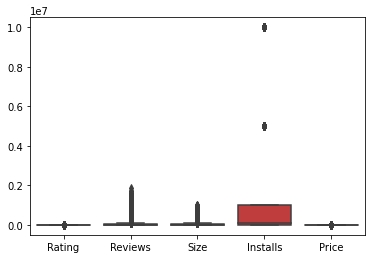

In [34]:
sns.boxplot(google)

Interpretation: price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
 reviews and install rates are also seems to be not equal. 
 hence there are outliers hence lets get rid of it.

array([[<AxesSubplot: title={'center': 'Rating'}>,
        <AxesSubplot: title={'center': 'Reviews'}>],
       [<AxesSubplot: title={'center': 'Size'}>,
        <AxesSubplot: title={'center': 'Installs'}>],
       [<AxesSubplot: title={'center': 'Price'}>, <AxesSubplot: >]],
      dtype=object)

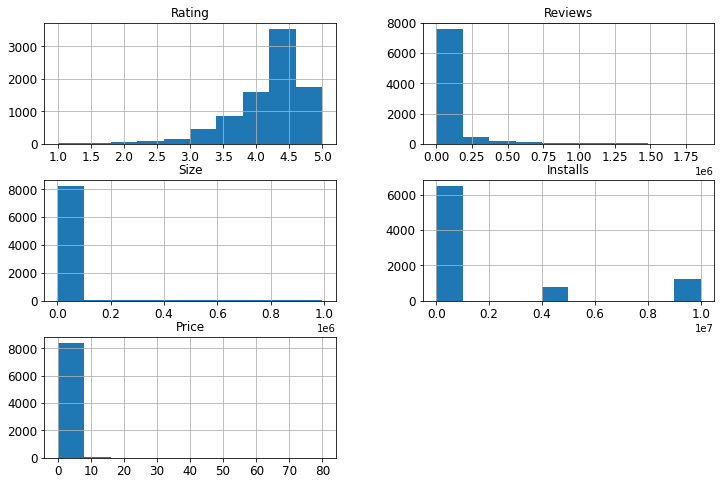

In [35]:
google.hist(['Rating', 'Reviews', 'Size', 'Installs', 'Price'],figsize=(12,8),xlabelsize= 12
            ,ylabelsize= 12)



In [36]:
google.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

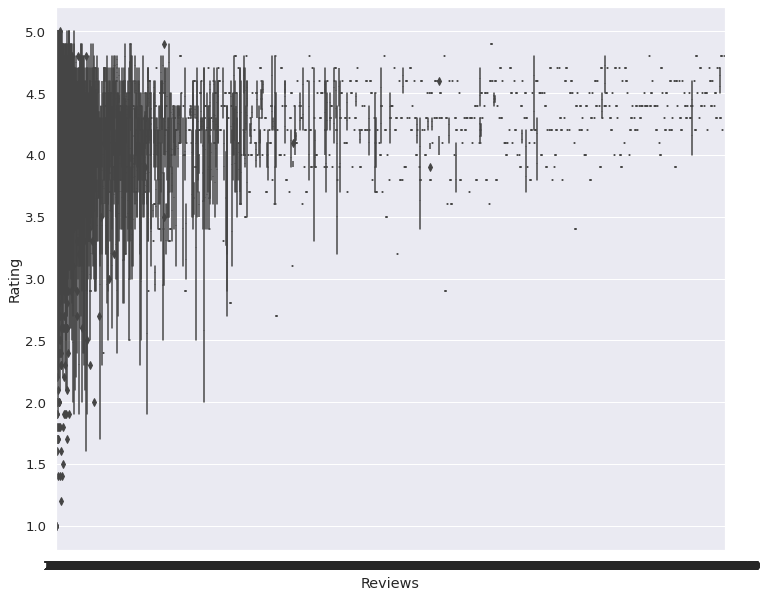

In [37]:
# lets see he relationship between the different columns.
plt.figure(figsize=(12,10))
sns.set_style(style="whitegrid")
sns.set(font_scale=1.2)
sns.boxplot(data=google,x='Reviews',y= 'Rating')
plt.show()

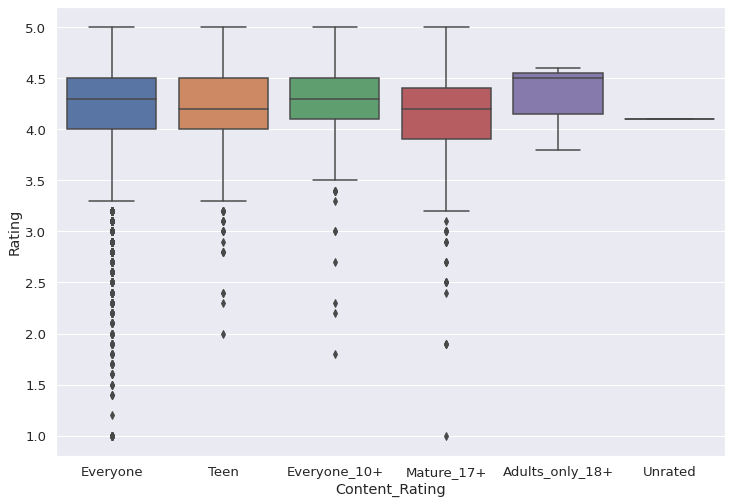

In [38]:
plt.figure(figsize=(12, 8.27))
sns.set_style(style='whitegrid')
sns.set(font_scale=1.2)
sns.boxplot(data=google, x='Content_Rating', y='Rating')

plt.show()

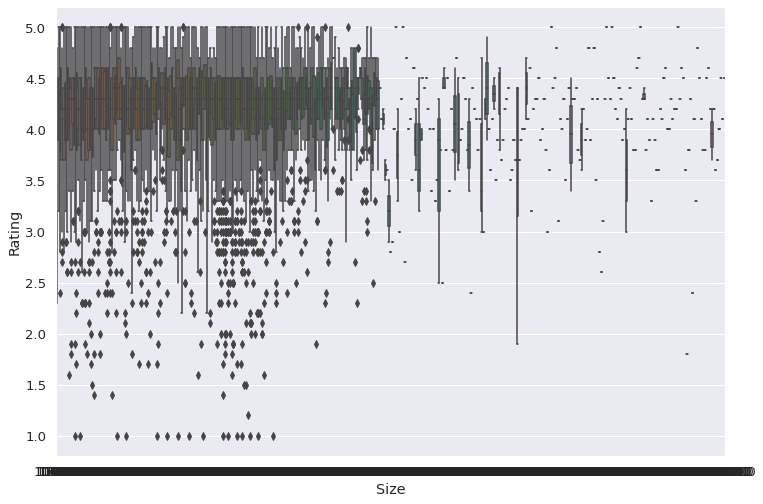

In [39]:
plt.figure(figsize=(12, 8.27))
sns.set_style(style='whitegrid')
sns.set(font_scale=1.2)
sns.boxplot(data=google, x='Size', y='Rating')

plt.show()

Interpretation: we can see that there are alot of outliers and data is bit messy to read  which can hinder the model prediction, hence it required more data preprocessing.

In [40]:
# data preprocessing:
# lets drop the column which does not have any impact on the model prediction
print(google.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [41]:
# from above we can see that App, Last Updated', 'Current Ver',Android Ver has no impact on target of the google play store ratings, review, price.
print("before droping the column the shape of the google play store is {}".format(google.shape))
google =google.drop(['App', 'Last Updated', 'Current Ver','Android Ver'], axis=1)
print("After droping the column the shape of the google play store is {}".format(google.shape))


before droping the column the shape of the google play store is (8494, 13)
After droping the column the shape of the google play store is (8494, 9)


In [42]:
google.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art_&_Design
1,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art_&_Design_Pretend_Play
2,ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art_&_Design
4,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art_&_Design_Creativity
5,ART_AND_DESIGN,4.4,167.0,5600.0,50000.0,Free,0.0,Everyone,Art_&_Design


In [43]:
google =pd.get_dummies(google,drop_first= True)
print(" the column of google play store are",google.columns)


 the column of google play store are Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)


In [44]:
google.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
0,4.1,159.0,19000.0,10000.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,14000.0,500000.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8700.0,5000000.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,2800.0,100000.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167.0,5600.0,50000.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
google.shape

(8494, 157)

Interpretation:  from above data we have observed that in the column review and Install they have outliers and before building the linear regression mdel, it is a necessary to reduce the skewness.
for that we need to use log transformation to the column reviews and installs.


2. After getting the dummy columns for the columns Category ,Genres and Content_rating. This needs to be done as the models do not uderstand categorical data, and all data should be numeric.Hence, Dummy Encoding is one of the way to convert character fields to numeric. 


In [46]:
google.Installs

0           10000.0
1          500000.0
2         5000000.0
4          100000.0
5           50000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 8494, dtype: float64

In [47]:
google.Installs =google.Installs.apply(np.log1p)

In [48]:
google.Installs

0         9.210440
1        13.122365
2        15.424949
4        11.512935
5        10.819798
           ...    
10834     6.216606
10836     8.517393
10837     4.615121
10839     6.908755
10840    16.118096
Name: Installs, Length: 8494, dtype: float64

In [49]:
google.Reviews

0           159.0
1           967.0
2         87510.0
4           967.0
5           167.0
           ...   
10834         7.0
10836        38.0
10837         4.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 8494, dtype: float64

In [50]:
google.Reviews= google.Reviews.apply(np.log1p)

In [51]:
google.Reviews

0         5.075174
1         6.875232
2        11.379520
4         6.875232
5         5.123964
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 8494, dtype: float64

# Model Prediction
lets import the file train_test_split, logistic regression


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import StandardScaler

In [53]:
X=google.iloc[:,1:]
Y=google.iloc[:,:1]

In [54]:
print(" The X dataset shape",X.shape)
print("The Y dataset shape ", Y.shape)

 The X dataset shape (8494, 156)
The Y dataset shape  (8494, 1)


In [55]:
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=23)

In [56]:
print("The x_train", x_train.shape)
print("The x_test",x_test.shape)
print("The y_train", y_train.shape)
print("The y_test",y_test.shape)

The x_train (6795, 156)
The x_test (1699, 156)
The y_train (6795, 1)
The y_test (1699, 1)


In [57]:
#x_train =scaler.fit_transform(x_train)
x_train

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
3139,7.919720,39000.0,15.424949,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4856,12.441603,99000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7029,5.723585,8300.0,11.512935,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9437,2.772589,5200.0,6.908755,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,10.355645,17000.0,13.815512,0.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,4.615121,17000.0,6.908755,3.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4559,7.981392,93000.0,10.819798,4.77,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,12.595483,10000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405,10.527311,8400.0,13.815512,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# x_test= scaler.fit_transform(x_test)
x_test

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
3800,12.600753,14000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
359,12.049606,4000.0,16.118096,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
357,9.941265,18000.0,13.815512,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9193,2.484907,15000.0,6.908755,0.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9353,10.309253,99000.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6929,4.248495,951000.0,6.908755,0.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10691,2.995732,1600.0,6.216606,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3942,11.829188,81000.0,15.424949,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4132,8.599326,31000.0,11.512935,4.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
linreg= LinearRegression()
linreg

LinearRegression()

In [60]:
y_train 

,Rating
3139,3.0
4856,4.6
7029,3.1
9437,4.7
93,4.6
...,...
4963,4.5
4559,3.8
42,4.4
405,4.3


In [61]:
import numpy as np
linreg.fit(x_train, y_train)
y_pred=linreg.predict(x_test)

y_test=np.array(y_test)
y_pred=np.array(y_pred)

a=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()});a.head(10)

,Actual,Predicted
0,4.3,4.270089
1,4.2,4.176790
2,3.6,4.158290
3,3.5,4.163930
4,4.0,4.120641
5,4.2,4.165760
6,4.4,4.187668
7,4.3,4.386879
8,4.5,4.674462
9,3.8,4.284005


In [62]:
lin_score= linreg.score(x_train,y_train)
lin_score

0.16485834058497784

In [63]:
import statsmodels.api as sm
from statsmodels.api import OLS

<AxesSubplot: >

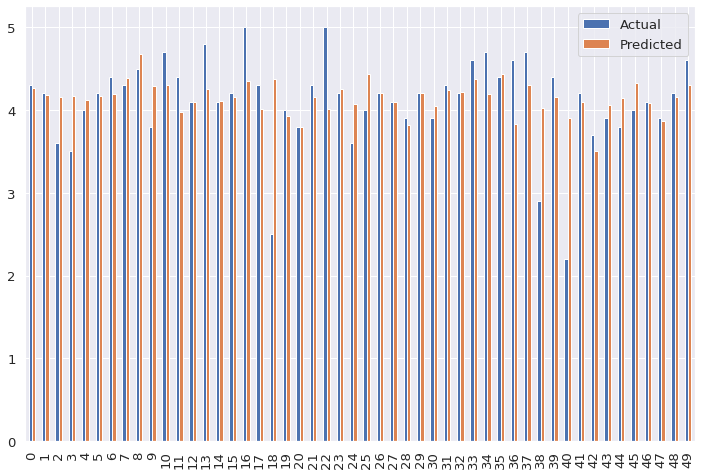

In [64]:
fig =a.head(50)
fig.plot(kind='bar',figsize=(12,8))

we can see that model is predicting precisely well

In [65]:
#Applying linear regression
model1 = sm.OLS(y_train, x_train)
model1=model1.fit()

In [66]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3849.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):                        0.00
Time:                        19:08:30   Log-Likelihood:                         -4789.5
No. Observations:                6795   AIC:                                      9831.
Df Residuals:                    6669   BIC:                                  1.069e+04
Df Model:                         126                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1777      0.006     29.248      0.000       0.166       0.190
Size                                         -7.368e-08   6.62e-08     -1.113      0.266   -2.03e-07     5.6e-08
Installs                                        -0.1542      0.006    -25.071      0.000      -0.166      -0.142
Price                                           -0.0017      0.004     -0.466      0.641      -0.009       0.005
Category_AUTO_AND_VEHICLES                       1.5194      0.120     12.685      0.000       1.285       1.754
Category_BEAUTY                                  1.6367      0.123     13.312      0.000       1.396       1.878
Category_BOOKS_AND_REFERENCE                     1.5745      0.117     13.440      0.000       1.345       1.804
Category_BUSINESS                                1.4881      0.116     12.820      0.000       1.261       1.716
Category_COMICS                                  2.2447      0.224     10.014      0.000       1.805       2.684
Category_COMMUNICATION                           1.4439      0.116     12.402      0.000       1.216       1.672
Category_DATING                                  1.3936      0.118     11.855      0.000       1.163       1.624
Category_EDUCATION                               2.6367      0.239     11.035      0.000       2.168       3.105
Category_ENTERTAINMENT                           2.5258      0.240     10.531      0.000       2.056       2.996
Category_EVENTS                                  1.6363      0.122     13.432      0.000       1.397       1.875
Category_FAMILY                                  2.6273      0.232     11.302      0.000       2.172       3.083
Category_FINANCE                                 1.4651      0.116     12.621      0.000       1.237       1.693
Category_FOOD_AND_DRINK                          1.4880      0.118     12.601      0.000       1.257       1.719
Category_GAME                                    2.9140      0.231     12.632      0.000       2.462       3.366
Category_HEALTH_AND_FITNESS                      1.5209      0.116     13.086      0.000       1.293       1.749
Category_HOUSE_AND_HOME                          1.5080      0.120     12.607      0.000       1.274       1.743
Category_LIBRARIES_AND_DEMO                      1.5539      0.121     12.861      0.000       1.317       1.791
Category_LIFESTYLE                               1.8855      0.226      8.360      0.000       1.443       2.328
Category_MAPS_AND_NAVIGATION                     1.4283      0.118     12.100      0.000       1.197       1.660
Category_MEDICAL                              

In [67]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error,mean_absolute_error, explained_variance_score

In [68]:
lin_accuracy =explained_variance_score(y_test,y_pred)
lin_accuracy= round(lin_accuracy*100,6)
print("Linear Regression ModelAcurracy on test data:", lin_accuracy,"%")
print()
lin_mae =mean_absolute_error(y_test,y_pred)
lin_mse =mean_squared_error(y_test,y_pred)
lin_rmse =lin_mse*(1/2)
print("MAE:" ,lin_mae)
print("MSE:",lin_mse)
print("RMSE:",lin_rmse)
print()

Linear Regression ModelAcurracy on test data: 12.867859 %

MAE: 0.34717754478544766
MSE: 0.2497547471269906
RMSE: 0.1248773735634953



In [69]:
print("SGD Regression:Diabetes Prediction")
sgd_reg =SGDRegressor()
sgd_reg.fit(x_train,y_train)
sgd_score =sgd_reg.score(x_train,y_train)
print("R-squared on Train:", sgd_score)
y_pred_sgd =sgd_reg.predict(x_test)
sgd_accuracy = explained_variance_score(y_test, y_pred_sgd)
sgd_accuracy = round(sgd_accuracy*100, 6)
print("SGD Regressor Model Accuracy on Test:", sgd_accuracy, "%")
print()
sgd_mae =mean_absolute_error(y_test,y_pred_sgd)
sgd_mse =mean_squared_error(y_test,y_pred_sgd)
sgd_rmse=sgd_mse*(1/2)

print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)
print()

SGD Regression:Diabetes Prediction


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared on Train: -1.2341968582263784e+37
SGD Regressor Model Accuracy on Test: -8.93024951672048e+38 %

MAE: 6.315689490374587e+17
MSE: 2.9572774392287917e+36
RMSE: 1.4786387196143959e+36



In [70]:
# lets form the tabular formate for statsmodel using ordinary least square OLS method.
# performing the evaluation matrix comparision 
model_table_1 =pd.DataFrame(columns=["Comparision Matrix","LR Model","SGD Model"])
model_table_1["Comparision Matrix"]=["Accuracy(Variance Score)","R2 Score","MAE","MSE","RMSE"]
model_table_1["LR Model"]=[lin_accuracy,lin_score,lin_mae,lin_mse,lin_rmse]
model_table_1["SGD Model"]=[sgd_accuracy,sgd_score,sgd_mae,sgd_mse,sgd_rmse]
print(tabulate(model_table_1,headers="keys",tablefmt="fancy_outline",numalign="left"))

╒════╤══════════════════════════╤════════════╤══════════════╕
│    │ Comparision Matrix       │ LR Model   │ SGD Model    │
╞════╪══════════════════════════╪════════════╪══════════════╡
│ 0  │ Accuracy(Variance Score) │ 12.8679    │ -8.93025e+38 │
│ 1  │ R2 Score                 │ 0.164858   │ -1.2342e+37  │
│ 2  │ MAE                      │ 0.347178   │ 6.31569e+17  │
│ 3  │ MSE                      │ 0.249755   │ 2.95728e+36  │
│ 4  │ RMSE                     │ 0.124877   │ 1.47864e+36  │
╘════╧══════════════════════════╧════════════╧══════════════╛


# lets try with Standard Scaler for SGDregressor, tabular format.

In [72]:
from tabulate import tabulate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
scaler= StandardScaler()
scaler

StandardScaler()

In [74]:
x= google.drop('Rating',axis=1)
y= google.Rating

In [75]:
print("The x shape is:",x.shape)
print("The y shape is:",y.shape)

The x shape is: (8494, 156)
The y shape is: (8494,)


In [76]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y, test_size=0.3, random_state=30)

In [77]:
print("The x_train shape",X_train.shape)
print("The shape of X_test",X_test.shape)
print("The Y_train Shape",Y_train.shape)
print("The Y_test shape",Y_test.shape)

The x_train shape (5945, 156)
The shape of X_test (2549, 156)
The Y_train Shape (5945,)
The Y_test shape (2549,)


In [78]:
scaler =StandardScaler().fit(X_train)

In [79]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
X_train;X_test

array([[-0.27687705,  3.77153482, -0.72259123, ..., -0.01834476,
        -0.09116315, -0.04858476],
       [-0.59779029, -0.3104075 , -0.05962626, ..., -0.01834476,
        -0.09116315, -0.04858476],
       [ 0.21415294, -0.20501798, -0.05962626, ..., -0.01834476,
        -0.09116315, -0.04858476],
       ...,
       [ 0.48890313, -0.24847758,  0.40378217, ..., -0.01834476,
        -0.09116315, -0.04858476],
       [ 0.4535812 , -0.34626166,  0.60336202, ..., -0.01834476,
        -0.09116315, -0.04858476],
       [ 0.7630694 , -0.25934247,  0.60336202, ..., -0.01834476,
        -0.09116315, -0.04858476]])

In [81]:
train_data=pd.DataFrame(X_train)
train_data['Price']=Y_train

In [82]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,Price
0,-1.101469,3.239155,-0.722591,-0.156277,-0.093021,-0.0724,-0.14893,-0.193238,-0.084351,-0.168958,...,-0.012971,-0.158114,-0.012971,-0.055109,-0.123982,-0.018345,-0.018345,-0.091163,-0.048585,4.1
1,1.010209,-0.270207,0.603362,-0.156277,-0.093021,-0.0724,-0.14893,-0.193238,-0.084351,-0.168958,...,-0.012971,-0.158114,-0.012971,-0.055109,-0.123982,-0.018345,-0.018345,-0.091163,-0.048585,NaN
2,-0.423062,0.012280,-0.722591,-0.156277,-0.093021,-0.0724,-0.14893,-0.193238,-0.084351,5.918640,...,-0.012971,-0.158114,-0.012971,-0.055109,-0.123982,-0.018345,-0.018345,-0.091163,-0.048585,4.7
3,0.748811,0.436011,0.603362,-0.156277,-0.093021,-0.0724,-0.14893,-0.193238,-0.084351,-0.168958,...,-0.012971,-0.158114,-0.012971,-0.055109,-0.123982,-0.018345,-0.018345,-0.091163,-0.048585,NaN
4,1.027064,-0.139829,1.066773,-0.156277,-0.093021,-0.0724,-0.14893,-0.193238,-0.084351,-0.168958,...,-0.012971,-0.158114,-0.012971,-0.055109,-0.123982,-0.018345,-0.018345,-0.091163,-0.048585,4.3


In [83]:
X_test =np.array(X_test)
Y_test= np.array(Y_test)

In [84]:
print("Linear Regression: Google Play store prediction")
lin_reg =LinearRegression()
lin_reg

Linear Regression: Google Play store prediction


LinearRegression()

In [85]:
lin_reg.fit(X_train,Y_train)
lin_score= lin_reg.score(X_train,Y_train)
print("R-Squared on the traim data:",lin_score)

R-Squared on the traim data: 0.1509702880911723


In [86]:
lin_y_pred =lin_reg.predict(X_test)
lin_accuracy=explained_variance_score(Y_test, lin_y_pred)
lin_accuracy= round(lin_accuracy*100,6)
print("Linear Regression ModelAcurracy on test data:", lin_accuracy,"%")
print()
lin_mae =mean_absolute_error(Y_test,lin_y_pred)
lin_mse= mean_squared_error(Y_test,lin_y_pred)
lin_rmse=lin_mse*(1/2.0)
print("MAE:" ,lin_mae)
print("MSE:",lin_mse)
print("RMSE:",lin_rmse)
print()

Linear Regression ModelAcurracy on test data: -9.163047384133715e+26 %

MAE: 39136358833.476875
MSE: 2.6126560258909894e+24
RMSE: 1.3063280129454947e+24



In [87]:
print("SGD Regression:Diabetes Prediction")
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, Y_train)
sgd_score = sgd_reg.score(X_train, Y_train)
print("R-squared on Train:", sgd_score)

sgd_y_pred = sgd_reg.predict(X_test)
sgd_accuracy = explained_variance_score(Y_test, sgd_y_pred)
sgd_accuracy = round(sgd_accuracy*100, 6)
print("SGD Regressor Model Accuracy on Test:", sgd_accuracy, "%")
print()

sgd_mae = mean_absolute_error(Y_test, sgd_y_pred)
sgd_mse = mean_squared_error(Y_test, sgd_y_pred)
sgd_rmse = sgd_mse*(1/2.0)

print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)
print()

SGD Regression:Diabetes Prediction
R-squared on Train: -56845206.41751026
SGD Regressor Model Accuracy on Test: -10840628211.275059 %

MAE: 237.5329574846341
MSE: 30932663.18062522
RMSE: 15466331.59031261



In [88]:
#Performing evaluation matrix comparison
model_table = pd.DataFrame(columns = ["Comparison Matrix", "LR Model", "SGD Model"])
model_table["Comparison Matrix"] = ["Accuracy (Variance Score)", "R2 Score", "MAE", "MSE", "RMSE"]
model_table["LR Model"] = [lin_accuracy, lin_score, lin_mae, lin_mse, lin_rmse]
model_table["SGD Model"] = [sgd_accuracy, sgd_score, sgd_mae, sgd_mse, sgd_rmse]

print(tabulate(model_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+----+---------------------------+--------------+--------------+
|    | Comparison Matrix         | LR Model     | SGD Model    |
|----+---------------------------+--------------+--------------|
| 0  | Accuracy (Variance Score) | -9.16305e+26 | -1.08406e+10 |
| 1  | R2 Score                  | 0.15097      | -5.68452e+07 |
| 2  | MAE                       | 3.91364e+10  | 237.533      |
| 3  | MSE                       | 2.61266e+24  | 3.09327e+07  |
| 4  | RMSE                      | 1.30633e+24  | 1.54663e+07  |
+----+---------------------------+--------------+--------------+


In [89]:
prediction_table = pd.DataFrame(columns=["Actual Value","LR Predicted Value", "SGD Predicted Value"])
prediction_table["Actual Value"] = Y_test

prediction_table["LR Predicted Value"] = lin_y_pred
prediction_table["SGD Predicted Value"] = sgd_y_pred

print(tabulate(prediction_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+------+----------------+----------------------+-----------------------+
|      | Actual Value   | LR Predicted Value   | SGD Predicted Value   |
|------+----------------+----------------------+-----------------------|
| 0    | 4.2            | 4.13719              | -64.9616              |
| 1    | 3.9            | 3.74436              | -50.4024              |
| 2    | 4              | 4.27024              | 23.2021               |
| 3    | 4.7            | 4.03343              | 20.6508               |
| 4    | 4              | 4.14634              | -57.739               |
| 5    | 4.2            | 4.14085              | 98.2101               |
| 6    | 2.9            | 4.03245              | -16.7091              |
| 7    | 4.1            | 4.16722              | -1.26626              |
| 8    | 4.7            | 3.75462              | 75.8889               |
| 9    | 3.9            | 3.85789              | -34.0408              |
| 10   | 4.3            | 3.92613              | -2

# Conclusion:
Standard Scaler has same  effect as Compared to OLS model function. hence the accuracy model score by using Standard Scaler is 12.86%
and OLS model Score is12.86%  using Linear Regression